# __Heart Disease Prediction – Part 4__

# __Neural Networks (NN) and Convolutional Neural Nerworks (CNN)__

## __Importing the Necessary Libraries__

In [1]:
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, auc, roc_curve, accuracy_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.linear_model import LogisticRegression

import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib.pylab import rcParams
from matplotlib.legend_handler import HandlerLine2D



import warnings
warnings.warn("")

RandomState = 42

/var/folders/gg/nyy02mv176d4bmg5__wp49y40000gn/T/ipykernel_27692/2998328552.py:18: UserWarning: 
  warnings.warn("")


## __Using the stored df from part 1__

In [2]:
%store -r df_shuffle
df = df_shuffle
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,68,0,2,120,211,0,0,115,0,1.5,1,0,2,1
1,44,1,0,110,197,0,0,177,0,0.0,2,1,2,0
2,42,0,0,102,265,0,0,122,0,0.6,1,0,2,1
3,69,0,3,140,239,0,1,151,0,1.8,2,2,2,1
4,64,0,0,130,303,0,1,122,0,2.0,1,2,2,1


## __Creating and Obtaining a Test Set__

### __Obtaining the DataSet__

In [3]:
X = df.iloc[:,:-1]
y = df['target']

### __Spliting the Dataset__

In [4]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

## __Linear Regression__

In [5]:
def getPerformanceMetric(y, y_pred):
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    print("tn:", tn, " fp: ", fp, " fn: ", fn, " tp: ", tp)
    print(classification_report(y, y_pred))

    fpr, tpr, _ = roc_curve(y, y_pred)
    roc_auc = auc(fpr, tpr)
    plt.figure()
    plt.figure(figsize=[6,4])
    plt.plot(fpr, tpr, label="ROC curve (area = %0.2f)" % roc_auc)
    plt.plot([0, 1], [0, 1], "--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc="lower right")
    print()

In [6]:
clf_linear = svm.SVC(kernel='linear', C = 1.0, random_state=RandomState)
clf_linear.fit(X_train,y_train)
y_pred_linear = clf_linear.predict(X_test)

### __Without 10-Fold Cross Validation__

tn: 23  fp:  14  fn:  5  tp:  49
              precision    recall  f1-score   support

           0       0.82      0.62      0.71        37
           1       0.78      0.91      0.84        54

    accuracy                           0.79        91
   macro avg       0.80      0.76      0.77        91
weighted avg       0.80      0.79      0.78        91




<Figure size 432x288 with 0 Axes>

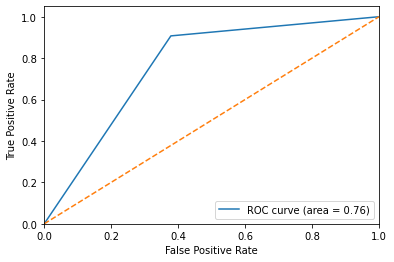

In [7]:
getPerformanceMetric(y_test, y_pred_linear)

### __With 10-Fold Cross Validation__

In [10]:
clf_cv = KFold(n_splits=10, random_state=RandomState, shuffle=True)

scores_cv = cross_val_score(clf_linear, X, y, scoring='accuracy', cv=clf_cv, n_jobs=1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores_cv), np.std(scores_cv)))

Accuracy: 0.845 (0.034)


## __Logistic Regression__

tn: 23  fp:  14  fn:  5  tp:  49
              precision    recall  f1-score   support

           0       0.82      0.62      0.71        37
           1       0.78      0.91      0.84        54

    accuracy                           0.79        91
   macro avg       0.80      0.76      0.77        91
weighted avg       0.80      0.79      0.78        91




<Figure size 432x288 with 0 Axes>

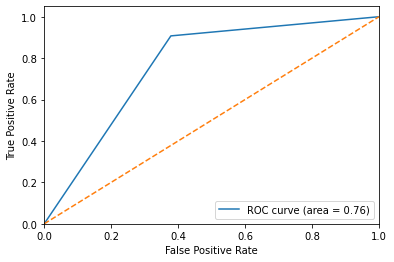

In [23]:
clf_logReg = LogisticRegression(max_iter=10000)
clf_logReg.fit(X_train, y_train)
y_pred_logReg = clf_logReg.predict(X_test)
getPerformanceMetric(y_test, y_pred_logReg)

In [24]:
clf_cv = KFold(n_splits=10, random_state=RandomState, shuffle=True)

scores_cv_logreg = cross_val_score(clf_logReg, X, y, scoring='accuracy', cv=clf_cv, n_jobs=1)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores_cv_logreg), np.std(scores_cv_logreg)))

Accuracy: 0.832 (0.050)


## __Multi Layer Perceptron__

In [11]:
def buildMultiLevelPerceptron(activation_func, num_neurons, epoch, learningrate, 
                                momentum_param, validation_thresh, iteration=True, single=False):
    global X_train, y_train, X_test, y_test, RandomState

    clf_mlp = MLPClassifier(hidden_layer_sizes=num_neurons, 
                            max_iter=epoch, activation=activation_func,
                            solver='adam', verbose=False, random_state=1, learning_rate='constant',
                            learning_rate_init=learningrate, momentum=momentum_param, validation_fraction=validation_thresh)
    clf_mlp.fit(X_train, y_train)

    predictions = clf_mlp.predict(X_test)
    score = accuracy_score(y_test, predictions)
    if(iteration==False):
        getPerformanceMetric(y_test, predictions)
        print("Mean Accuracy of Predictions: " + str(score))
    else:
        if (single == False):
            return score, clf_mlp.best_loss_
        else:
            return score, clf_mlp.loss_curve_

tn: 0  fp:  37  fn:  0  tp:  54
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        37
           1       0.59      1.00      0.74        54

    accuracy                           0.59        91
   macro avg       0.30      0.50      0.37        91
weighted avg       0.35      0.59      0.44        91


Mean Accuracy of Predictions: 0.5934065934065934


/Users/jonlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/jonlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jonlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/jonlee/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: Un

<Figure size 432x288 with 0 Axes>

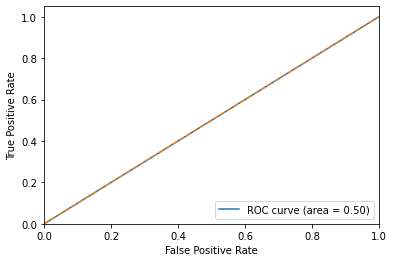

In [12]:
buildMultiLevelPerceptron('relu', (4,2), 200, 0.0001, 0.9, 0.5, iteration=False)

## __Parameter Search__

### __Activation Function__

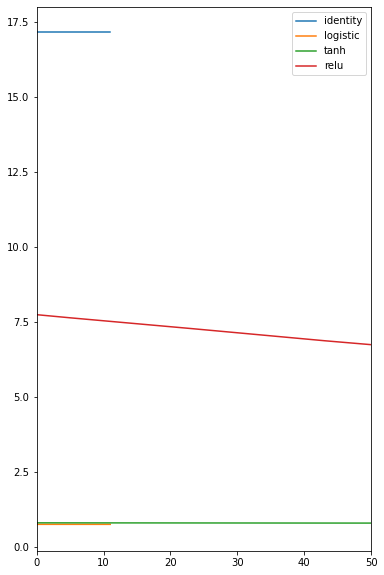

Accuracy for identity ; 0.5934065934065934 loss: 17.171744671836496
Accuracy for logistic ; 0.5934065934065934 loss: 0.7597772082792833
Accuracy for tanh ; 0.5934065934065934 loss: 0.7772288684269685
Accuracy for relu ; 0.5934065934065934 loss: 2.996432112139174


In [63]:
activation_func = ['identity', 'logistic', 'tanh', 'relu']

it_acc = []
it_loss = []

plt.figure(figsize=(6,10))

for item in activation_func:
    acc, loss = buildMultiLevelPerceptron(item, (4,2), 1000, 0.0001, 0.9, 0.5, single=True)
    it_acc.append(acc)
    it_loss.append(loss)
    plt.plot(loss)
plt.xlim([0,50])
plt.legend(activation_func)
plt.show()

range_sorted = sorted(range(len(it_acc)), key=lambda k: it_acc[k])

for i in range_sorted:
    print("Accuracy for", activation_func[i], ";", it_acc[i], "loss:", np.mean(it_loss[i]))

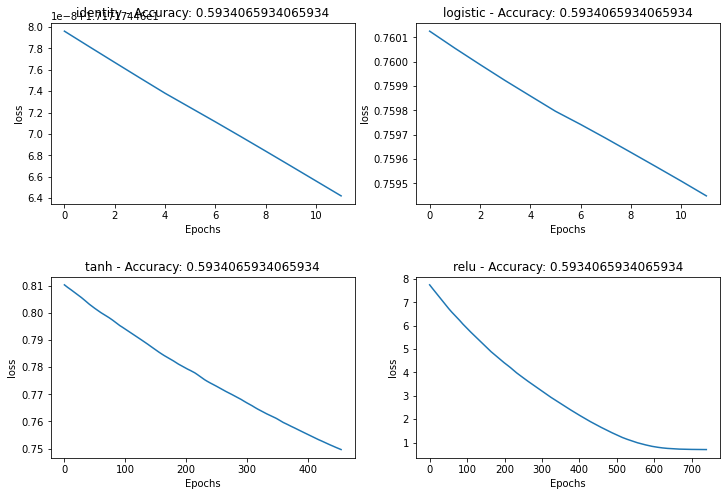

In [14]:
fig = plt.figure(figsize=(12, 8))
plt.subplots_adjust(hspace=0.4)
ax = []
for i in range(len(it_loss)):
    const = i + 1
    const = 220 + const
    ax.append(fig.add_subplot(const))
    i = i+1

for i in range(len(it_loss)):
    string = activation_func[i] + " - Accuracy: " + str(it_acc[i])
    ax[i].set_title(string)
    ax[i].plot(it_loss[i])
    ax[i].set_xlabel('Epochs')
    ax[i].set_ylabel('loss')

plt.show()

### __Number of Layer__

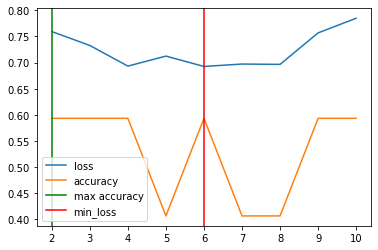

Best number of Layers: 2
Accuracy for 2 layers: 0.5934065934065934
Accuracy for 3 layers: 0.5934065934065934
Accuracy for 4 layers: 0.5934065934065934
Accuracy for 5 layers: 0.4065934065934066
Accuracy for 6 layers: 0.5934065934065934
Accuracy for 7 layers: 0.4065934065934066
Accuracy for 8 layers: 0.4065934065934066
Accuracy for 9 layers: 0.5934065934065934
Accuracy for 10 layers: 0.5934065934065934


In [15]:
layer_size = []

for i in range(11):
    k = []
    if (i > 1):
        k.append(4)
        if (i > 2):
            for j in range(i-2):
                # k.append(int(np.random.randint(2, 10, size=1)))
                k.append(4)
        k.append(2)
        layer_size.append(k)

it_acc = []
it_loss = []

for item in layer_size:
    acc, loss = buildMultiLevelPerceptron('logistic', item, 1000, 0.0001, 0.9, 0.5, single=False)
    it_acc.append(acc)
    it_loss.append(loss)

max_acc = max(it_acc)
max_acc_index = it_acc.index(max_acc)
min_loss = min(it_loss)
min_loss_index = it_loss.index(min_loss)

xk = np.linspace(2,20,18)
xk = list(map(int, xk))
xi = range(len(xk))
plt.xticks(xi, xk)
plt.plot(it_loss)
plt.plot(it_acc)
plt.axvline(x=max_acc_index, color='green')
plt.axvline(x=min_loss_index, color='red')
plt.legend(['loss', 'accuracy', 'max accuracy', 'min_loss'])
plt.show()

print("Best number of Layers:", max_acc_index+2)

range_sorted = sorted(range(len(it_acc)), key=lambda k: it_acc[k])

for i in range(len(it_acc)):
    print("Accuracy for", len(layer_size[i]), "layers:", it_acc[i])

### __Size of Layer__

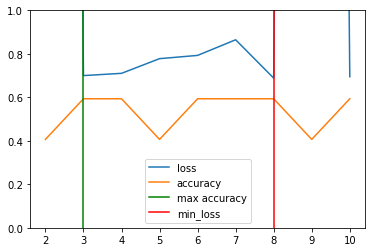

Best number of Layer Size: 3
Accuracy for [4, 2, 2] layers: 0.4065934065934066
Accuracy for [4, 5, 2] layers: 0.4065934065934066
Accuracy for [4, 9, 2] layers: 0.4065934065934066
Accuracy for [4, 3, 2] layers: 0.5934065934065934
Accuracy for [4, 4, 2] layers: 0.5934065934065934
Accuracy for [4, 6, 2] layers: 0.5934065934065934
Accuracy for [4, 7, 2] layers: 0.5934065934065934
Accuracy for [4, 8, 2] layers: 0.5934065934065934
Accuracy for [4, 10, 2] layers: 0.5934065934065934


In [16]:
layer_size = []

for i in range(11):
    k = []
    if (i > 1):
        k.append(4)
        k.append(i)
        k.append(2)
        layer_size.append(k)

it_acc = []
it_loss = []

for item in layer_size:
    acc, loss = buildMultiLevelPerceptron('relu', item, 1000, 0.0001, 0.9, 0.5, single=False)
    it_acc.append(acc)
    it_loss.append(loss)

max_acc = max(it_acc)
max_acc_index = it_acc.index(max_acc)
min_loss = min(it_loss)
min_loss_index = it_loss.index(min_loss)

xk = np.linspace(2,20,18)
xk = list(map(int, xk))
xi = range(len(xk))
plt.xticks(xi, xk)
plt.plot(it_loss)
plt.plot(it_acc)
plt.ylim([0, 1.0])
plt.axvline(x=max_acc_index, color='green')
plt.axvline(x=min_loss_index, color='red')
plt.legend(['loss', 'accuracy', 'max accuracy', 'min_loss'])
plt.show()

print("Best number of Layer Size:", max_acc_index+2)

range_sorted = sorted(range(len(it_acc)), key=lambda k: it_acc[k])

for i in range_sorted:
    print("Accuracy for", layer_size[i], "layers:", it_acc[i])

### __Learning Rate__

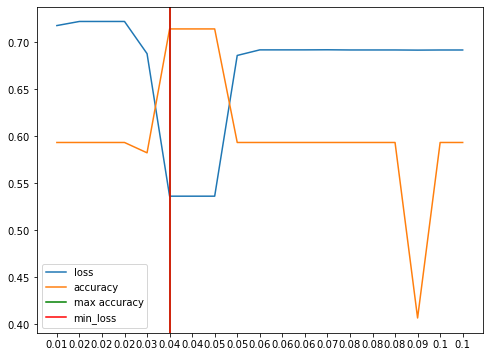

Best Learning Rate: 0.04
Accuracy for 0.01 Learnig Rate: 0.5934065934065934 Loss: 0.7178630489871554
Accuracy for 0.02 Learnig Rate: 0.5934065934065934 Loss: 0.7222287643867075
Accuracy for 0.02 Learnig Rate: 0.5934065934065934 Loss: 0.7222287643867075
Accuracy for 0.02 Learnig Rate: 0.5934065934065934 Loss: 0.7222287643867075
Accuracy for 0.03 Learnig Rate: 0.5824175824175825 Loss: 0.6879697911890023
Accuracy for 0.04 Learnig Rate: 0.7142857142857143 Loss: 0.5362417010169032
Accuracy for 0.04 Learnig Rate: 0.7142857142857143 Loss: 0.5362417010169032
Accuracy for 0.04 Learnig Rate: 0.7142857142857143 Loss: 0.5362417010169032
Accuracy for 0.05 Learnig Rate: 0.5934065934065934 Loss: 0.6860553422677834
Accuracy for 0.06 Learnig Rate: 0.5934065934065934 Loss: 0.6919895790180413
Accuracy for 0.06 Learnig Rate: 0.5934065934065934 Loss: 0.6919895790180413
Accuracy for 0.06 Learnig Rate: 0.5934065934065934 Loss: 0.6919895790180413
Accuracy for 0.07 Learnig Rate: 0.5934065934065934 Loss: 0.6920

In [17]:
lr = np.linspace(0, 0.1, 21)
lr = np.round(lr, 2)

it_acc = []
it_loss = []

for item in lr:
    if (item > 0):
        acc, loss = buildMultiLevelPerceptron('relu', (4,4,2), 1000, item, 0.9, 0.5, single=False)
        it_acc.append(acc)
        it_loss.append(loss)

max_acc = max(it_acc)
max_acc_index = it_acc.index(max_acc)
min_loss = min(it_loss)
min_loss_index = it_loss.index(min_loss)

xk = np.linspace(0.01, 0.1, len(it_loss))
xk = np.round(xk, 2)
xi = range(len(xk))

fig = plt.figure(figsize=(8, 6))

plt.xticks(xi, xk)
plt.plot(it_loss)
plt.plot(it_acc)
plt.axvline(x=max_acc_index, color='green')
plt.axvline(x=min_loss_index, color='red')
plt.legend(['loss', 'accuracy', 'max accuracy', 'min_loss'])
plt.show()

print("Best Learning Rate:", lr[max_acc_index+2])

for i in range(len(it_acc)):
    print("Accuracy for", lr[i+2], "Learnig Rate:", it_acc[i], "Loss:", it_loss[i])

### __Epochs__

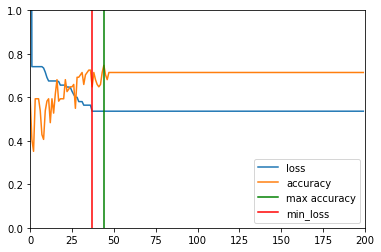

In [27]:
it_acc = []
it_loss = []

import warnings
warnings.filterwarnings("ignore")

for i in range(201):
    if (i > 0):
        acc, loss = buildMultiLevelPerceptron('relu', (4,4,2), i, 0.04, 0.9, 0.5, single=False)
        it_acc.append(acc)
        it_loss.append(loss)

max_acc = max(it_acc)
max_acc_index = it_acc.index(max_acc)
min_loss = min(it_loss)
min_loss_index = it_loss.index(min_loss)

plt.plot(it_loss)
plt.plot(it_acc)
plt.axvline(x=max_acc_index, color='green')
plt.axvline(x=min_loss_index, color='red')
plt.ylim([0, 1.0])
plt.xlim([0, 200])
plt.legend(['loss', 'accuracy', 'max accuracy', 'min_loss'])
plt.show()

Converges after 50 Epochs.

### __Momentum__

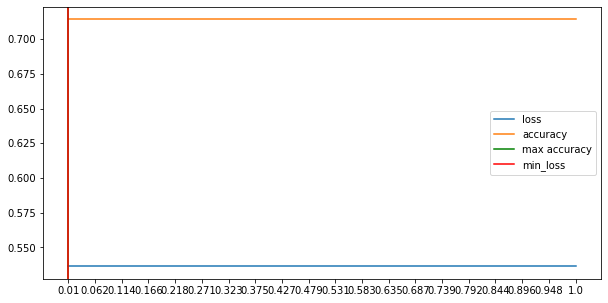

Best Momentum: 0.1


In [58]:
momentum = np.linspace(0, 1, 21)

it_acc = []
it_loss = []

for item in momentum:
    if (item > 0):
        acc, loss = buildMultiLevelPerceptron('relu', (4,4,2), 50, 0.04, item, 0.5, single=False)
        it_acc.append(acc)
        it_loss.append(loss)

max_acc = max(it_acc)
max_acc_index = it_acc.index(max_acc)
min_loss = min(it_loss)
min_loss_index = it_loss.index(min_loss)

xk = np.linspace(0.01, 1, len(it_loss))
xk = np.round(xk, 3)
xi = range(len(xk))

fig = plt.figure(figsize=(10, 5))

plt.xticks(xi, xk)
plt.plot(it_loss)
plt.plot(it_acc)
plt.axvline(x=max_acc_index, color='green')
plt.axvline(x=min_loss_index, color='red')
plt.legend(['loss', 'accuracy', 'max accuracy', 'min_loss'])
plt.show()

print("Best Momentum:", np.round(momentum[min_loss_index+2], 4))

### __Validation Threshold__

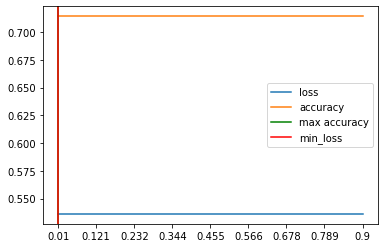

Best Momentum: 0.1
Best Accuracy: 0.7142857142857143 with loss: 0.5362417010169032


In [53]:
Validation = np.linspace(0, 1, 11)

it_acc = []
it_loss = []

for item in Validation:
    if (item > 0 and item < 1):
        acc, loss = buildMultiLevelPerceptron('relu', (4,4,2), 50, 0.04, 0.9, item, single=False)
        it_acc.append(acc)
        it_loss.append(loss)

max_acc = max(it_acc)
max_acc_index = it_acc.index(max_acc)
min_loss = min(it_loss)
min_loss_index = it_loss.index(min_loss)

xk = np.linspace(0.01, 0.9, len(it_loss))
xk = np.round(xk, 3)
xi = range(len(xk))

# fig = plt.figure(figsize=(8, 6))

plt.xticks(xi, xk)
plt.plot(it_loss)
plt.plot(it_acc)
plt.axvline(x=max_acc_index, color='green')
plt.axvline(x=min_loss_index, color='red')
plt.legend(['loss', 'accuracy', 'max accuracy', 'min_loss'])
plt.show()

print("Best Momentum:", np.round(Validation[min_loss_index+1], 4))
print("Best Accuracy:", max_acc, "with loss:", it_loss[max_acc_index])

## __Results__

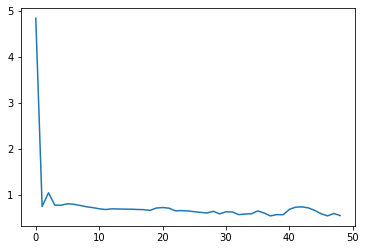

Best Accuracy: 0.7142857142857143 with min loss: 0.5362417010169032 at epoch = 37


In [52]:
acc, loss = buildMultiLevelPerceptron('relu', (4,4,2), 50, 0.04, 0.5, 0.1, single=True)
plt.plot(loss)
# plt.axhline(y=min(loss), color='green')
plt.show()
print("Best Accuracy:", acc, "with min loss:", min(loss), "at epoch =", loss.index(min(loss)))